# Исследование рынка видео игр

## Введение 

**Вводные данные проекта:**

**Заказчик:** интернет-магазине «Стримчик», который занимается продажей по всему миру компьютерных игр.

**Целью исследования являются** выявление определяющих успешность игры закономерностей и продукта-локомотива для планирования рекламной кампании на рынке видеоигр.

**Данные для анализа и построения модели:** исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

**Временной интервал предоставленных данных**: c 1980 по 2016 гг.

**Этапы проведения исследования:**
1. Изучить общую информацию об имеющейся базе
2. Провести предобработку данных:
   - анализ пропущенных значений и типов данных;
   - поиск дубликатов в данных.
3. Добавить в таблицу дополнительные столбцы:
   - суммарное количество продаж total_sales, 
   - расшифровка рейтингов ESRB. 
4. Провести исследовательский анализ данных:
   - оценить динамику выпуска видеоигр по годам;
   - оценить суммарные продажи игр в зависимости от платформы;
   - проанализировать влияние отзывов пользователей и критиков на количество продаж (ТОП-5 платформ по продажам игр);
   - определить наиболее прибыльные жанры видеоигр.
5. Сформировать портрет пользователя каждого региона
   - определить самые популярные платформы и жанры видеоигр в Северной Америке, Европе и Японии;
   - выявить предпочтения геймеров в этих регионах.
6. Сформулировать общий вывод по результатам исследования  

**Описание данных**
- Name — название игры 
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение общей информации о файле 

### Загрузка данных из файла в датафрейм

In [1]:
# загрузка нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats as st

In [2]:
# откроем файл с данными и выведем на экран первые пять строк
data = pd.read_csv('/datasets/games.csv')
display(data.head())

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

###  Общая информация о полученном датафрейме

In [3]:
# посмотрим общую информацию о датафрейме
# верно ли определен тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

### Вывод по итогам изучения общей информации о данных

1. Необходимые изменения форматов данных:
    - Year_of_Release необходимо преобразовать в int
    - User_Score преобразовать в тип float
2. В данных есть пропущенные значения. Требуется оценить их количество и принять решение о необходимости их заполнения.
3. Название столбцов нужно привести к нижнему регистру.

## Предобработка данных

### Преобразование типов данных

In [5]:
# переименуем столбцы датафрейма в формате нижнего регистра
data.columns = data.columns.str.lower()
display(data.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [6]:
# для преобразования year_of_release в int нужно обработать пропуски
# посмотрим количество пропусков в годах
data['year_of_release'].isna().sum()

269

В столбце с годом релиза 269 пропусков, это 1.6% от общей базы. Эти значения лучше удалить, так как анализь продаж без дат не является информативным.

In [7]:
# удалим пропущенные значения в year_of_release и изменим тип данных на float
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype('int')

В столбце user_score содержится строковое значение 'tbd', что, скорее всего, означает To Be Determined, то есть "Будет определено". Посмотрим по каким играм и годам встречается это значение.

In [8]:
# посмотрим какое количество таких значений
data.query('user_score == "tbd"')['user_score'].count()

2376

Значений tbd достаточно много. Посмотрим как они распределены по годам и по какому количеству игр встречаются.

In [9]:
(data.query('user_score == "tbd"').pivot_table(index='year_of_release', values ='name', aggfunc = 'count')
 .sort_values('name', ascending=False))

name
year_of_release      
2009              405
2010              331
2008              326
2011              217
2007              192
2002              192
2006              124
2005              121
2004              107
2003               95
2001               82
2000               43
2015               38
2016               34
2012               24
2014               21
2013               15
1999                8
1997                1

Значения tbd встречаются практически в каждом году. Чем больше игр выпускалось, тем соответственно, больше этих значений. Так как это обозначение отсутствия рейтинга, то заменим его на Nan. Это необходимо для преобразования столбца в float.

In [10]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()
data['user_score'].isna().sum()

8983

Значения tbd заменены на пропуски.

### Обработка пропусков

In [11]:
# определим долю и количество пропусков в данных в каждом столбце датафрейма
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(15,2), rot = -5, legend = False, fontsize = 12, color='skyblue')
            .set_title('Доля пропущенных значений в датафрейме' + "\n", fontsize = 15)    
        );    
    except:
        print('пропусков не осталось :) ')

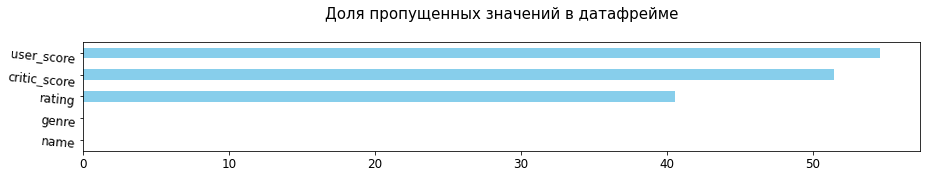

In [12]:
pass_value_barh(data)

In [13]:
# посмотрим количество пропусков
data.isna().sum().sort_values(ascending=False)

user_score         8983
critic_score       8463
rating             6678
name                  2
genre                 2
platform              0
year_of_release       0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

Пропусков в оценках критиков и пользователей более 50%, поэтому их удаление приведет к значительной потере данных для анализа. Заполнить эти значения не представляется возможным. Текущий тип данных не препятствует работе с данными, поэтому оставим пропуски в этих столбцах как есть.

In [14]:
# рассмотрим значения в столбце rating
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Без расшифровки эти данные не информативны. Создадим столбец с расшифровкой рейтинга Entertainment Software Rating Board (ESRB).

*Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.*

При этом заменим пропуски на значение "нет данных", так как рейтинг может быть не определен по играм других стран.

In [15]:
data['rating'] = data['rating'].fillna('ND')

Также заменим устаревшую категорию 'K-A' на 'E'.

In [16]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'].unique()

array(['E', 'ND', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
# создадим словарь с расшифровкой рейтинга
kat_rating = {'EC':'для детей младшего возраста', 'E':'для всех', 'E10+':'для всех от 10 лет и старше',
              'T':'подросткам', 'M':'для взрослых', 'AO':'только для взрослых', 'RP':'рейтинг ожидается', 'ND':'нет данных'}

In [18]:
# напишем формулу для заполнения расшифровки рейтинга
def rating_kategory(row):
    try:
        for x in kat_rating:
            if row['rating'] == x:
                return kat_rating[x]
    except:
        return 'ошибка'

In [19]:
# создадим новый столбец с расшифровкой рейтинга
data['rating_kategory'] = data.apply(rating_kategory, axis=1)

In [20]:
# посмотрим на строки с пропущенным названием игр и совпадают ли они с пропусками в жанре
data.query('name.isna()')

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
652    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14022  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score  user_score rating rating_kategory  
652           0.08           NaN         NaN     ND      нет данных  
14022         0.00           NaN         NaN     ND      нет данных

Пропуски в названии игр и жанре совпадают, их всего 2, поэтому уберем эти строки из датафрейма.

In [21]:
data = data.dropna(subset=['name']).reset_index(drop=True)

In [22]:
# проверим, что пропущенные значения удалены из столбца name
data.isna().sum().sort_values(ascending=False)

user_score         8981
critic_score       8461
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
rating_kategory       0
dtype: int64

### Добавление суммарных продаж в датафрейм

In [23]:
# добавление нового столбца с суммарными продажами
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(data.head())

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN     ND   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN     ND   

  rating_kategory  total_sales  
0        для всех        82.54  
1      нет данных        40.24  
2        для всех        35.52  
3        для всех        32.77  
4      нет данных        31.38

In [24]:
# проверим на дубликаты
data.duplicated().sum()

0

### Вывод по итогам предобработки данных

В процессе предобработки данных было выполнено:
- названия столбцов преобразованы в нижний регистр;
- удалены пропуски в столбце year_of_release, так как заполнить их не представлялось возможным (269 пропусков, 1,6% от общей базы)
- удалены пропуски в name и genre (2 пропуска)
- заменены на Nan значения tbd в столбце user_score, так как аббревиатура tbd предположительно означает не установленный рейтинг
- заменены пропуски в rating на ND (нет данных) и добавлена расшифровка рейтинга в отдельном столбце
- преобразованы типы данных в столбцах year_of_release (int), user_score (float)
- добавлен новый столбец с суммарным количеством продаж total_sales

## Исследовательский анализ данных

###  Динамика выпуска видеоигр по годам

In [26]:
# сводная таблица количества игр по годам
games_in_year = (data.pivot_table(index='year_of_release', values = 'name', aggfunc = 'count')
.sort_values('name', ascending=False))
games_in_year.columns = ['count']

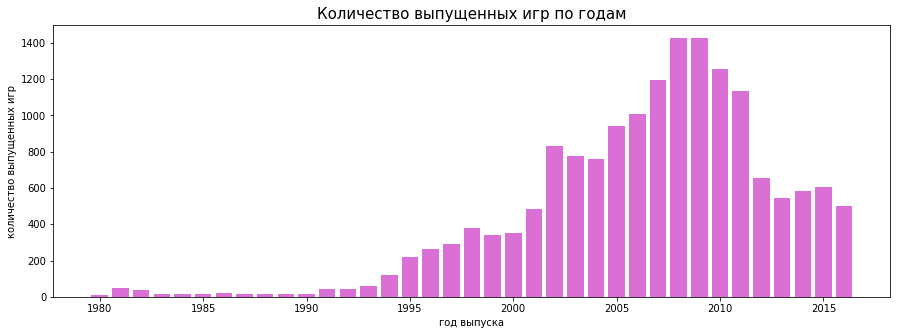

In [27]:
# построим столбчатую диаграмму по сводной таблице
x = games_in_year.index
y = games_in_year['count'] 

fig, ax = plt.subplots()
ax.bar(x, y, color='orchid')
ax.set_xlabel('год выпуска')
ax.set_ylabel('количество выпущенных игр')
fig.set_figwidth(15)    
fig.set_figheight(5) 
ax.set_title('Количество выпущенных игр по годам', fontdict={'size':15})
plt.show()

В период с 1980г. по 1993г. в индустрии видеоигр наблюдалась стагнация. С 1994г. по 2005г. наблюдался активный рост количества выпускаемых игр, а основной пик выпуска приходится на период с 2006г. по 2011г. Затем наблюдается достаточно резкий спад (практически в 2 раза) и с 2012г. по 2016г. игры выпускались в относительно одинаковом количестве (500-600 игр в год).

До 1990г. а продажи игр были незначительными на всех платформах. При сравнении динамики по годам возможно исключение данного периода при необходимости.

### Анализ суммарных продаж игр в зависимости от платформы

In [28]:
# определим ТОП-10 платформ по суммарным продажам 
platform_top10 = (data.pivot_table(index='platform', values='total_sales', aggfunc = 'sum')
                 .sort_values('total_sales', ascending=False).head(10))
display(platform_top10)

total_sales
platform             
PS2           1233.56
X360           961.24
PS3            931.34
Wii            891.18
DS             802.78
PS             727.58
PS4            314.14
GBA            312.88
PSP            289.53
3DS            257.81

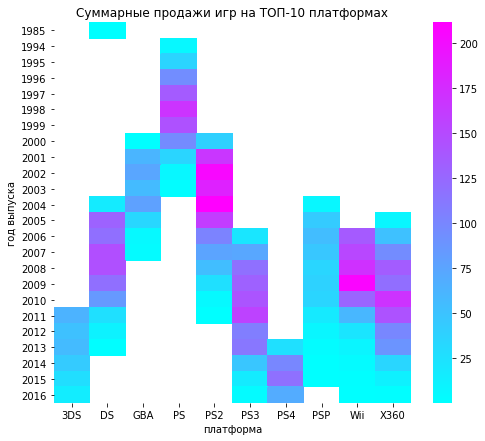

In [29]:
# построим тепловую карту по ТОП-10 платформам и суммарным продажам игр на данных платформах
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap((data.query('platform in @platform_top10.index')
                  .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc = 'sum')
                  ), square=False, cmap= 'cool')
ax.set_xlabel('платформа')
ax.set_ylabel('год выпуска')
plt.title("Суммарные продажи игр на ТОП-10 платформах", fontsize =12)
plt.show()

На диаграмме замечен артефакт по платформе DS. Данная консоль была выпущена только в 2004 году. Посмотрим по какой игре отмечены продажи в 1985 году.

In [30]:
data.query('platform == "DS" and year_of_release == 1985')

name platform  year_of_release   genre  \
15704  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15704       0.0       0.0      0.02          0.0           NaN         NaN   

      rating rating_kategory  total_sales  
15704     ND      нет данных         0.02

Данная игра действительно была выпущена до появления платформы DS ([данные об игре](https://www.vgchartz.com/game/4399/strongest-tokyo-university-shogi-ds/)). Платформа на которой была выпущена игра не известна, поэтому лучше данное значение убрать из базы.

In [31]:
data = data.drop(data[data['name'] == 'Strongest Tokyo University Shogi DS'].index)
# проверим, что строка удалена
data.query('platform == "DS" and year_of_release == 1985')

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, rating_kategory, total_sales]
Index: []

**Оценка доходности платформ**

Наибольшее количество игр продано на платформе PS2 в период с 2002 по 2004 гг. Далее продажи снижаются вследствие появления новых платформ и, предположительно, перераспределения рынка видеоигр между новыми платформами.

В последние годы (2014-2016гг.) наблюдается **рост продаж игр на платформе PS4**. Учитывая жизненный цикл платформ в ближайшие годы будет наблюдаться пик продаж игр на этой платформе, если не появятся дополнительные факторы, влияющие на продажи (появление других платформ или альтернативных устройств для видеоигр).

Суммарные продажи на платформах 3DS, PS3, Wii, X360 в период 2015-2016гг. снижаются и, учитывая примерный жизненный цикл платформы в 10-12 лет, можно предположить скорое прекращение выпуска игр на этих платформах.

Новые **платформы появляются примерно каждые пять лет**. При этом наибольшее количество платформ появились в период с 2004 по 2006 гг.

Срок жизни платформы составляет примерно 10-12 лет, при этом пик продаж игр приходится примерно на середину жизненного цикла конкретной платформы, то есть на 4-7 год существования платформы.

**Актуальным периодом** для прогноза на 2017 год возьмем период **с 2010г. по 2016г.** Платформы, появившиеся в начале этого периода, могут показать пиковые значения в 2017 году.

2016г. год может ситуационно исключаться из анализа, так как не содержит полной информации за год. На момент планирования год не окончен. Если бы была разбивка по месяцам, то можно было бы использовать 2016г., но сравнивать с аналогичными периодами (месяцами) прошлых лет.

Посмотрим какие платформы появились с 2010 года.
<a id='life'></a>

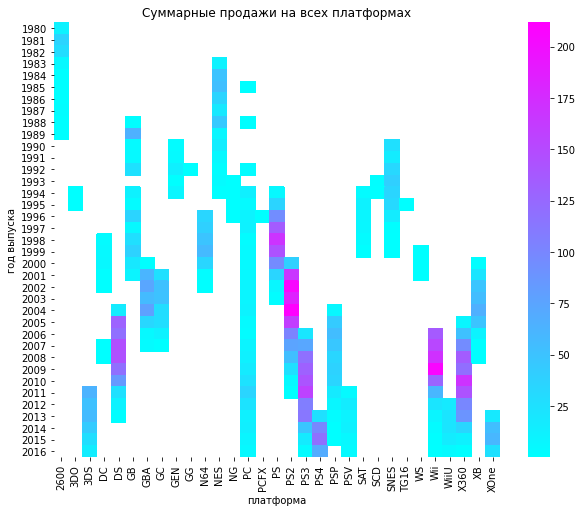

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap((data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc = 'sum')
                  ), cmap= 'cool', xticklabels=1)
ax.set_xlabel('платформа')
ax.set_ylabel('год выпуска')
plt.title("Суммарные продажи на всех платформах", fontsize =12)
plt.show()

Потенциально прибыльными в 2017 году могут быть следующие платформы:
- 3DS
- PS4
- PSV
- WiiU
- XOne

Выберем период для анализа с 2013г., период в который все выделенные платформы уже запустили продажи.

In [33]:
# зафиксируем список потенциально успешных платформ
platform_top5 = ['3DS', 'PS4', 'PSV', 'WiiU', 'XOne']    

In [34]:
# подготовим выборку за период с 2013г. по 2016г.
data_clean = data.loc[data['year_of_release']>= 2013, :].reset_index(drop=True)

In [35]:
data_clean

name platform  year_of_release         genre  \
0                Grand Theft Auto V      PS3             2013        Action   
1                Grand Theft Auto V     X360             2013        Action   
2         Call of Duty: Black Ops 3      PS4             2015       Shooter   
3               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
4                Grand Theft Auto V      PS4             2014        Action   
...                             ...      ...              ...           ...   
2228               Strawberry Nauts      PSV             2016     Adventure   
2229               Aiyoku no Eustia      PSV             2014          Misc   
2230  Samurai Warriors: Sanada Maru      PS3             2016        Action   
2231        Haitaka no Psychedelica      PSV             2016     Adventure   
2232            Winning Post 8 2016      PSV             2016    Simulation   

      na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         7.02      9.09      0.98         3.96          97.0         8.2   
1         9.66      5.14      0.06         1.41          97.0         8.1   
2         6.03      5.86      0.36         2.38           NaN         NaN   
3         5.28      4.19      4.35         0.78           NaN         NaN   
4         3.96      6.31      0.38         1.97          97.0         8.3   
...        ...       ...       ...          ...           ...         ...   
2228      0.00      0.00      0.01         0.00           NaN         NaN   
2229      0.00      0.00      0.01         0.00           NaN         NaN   
2230      0.00      0.00      0.01         0.00           NaN         NaN   
2231      0.00      0.00      0.01         0.00           NaN         NaN   
2232      0.00      0.00      0.01         0.00           NaN         NaN   

     rating rating_kategory  total_sales  
0         M    для взрослых        21.05  
1         M    для взрослых        16.27  
2        ND      нет данных        14.63  
3        ND      нет данных        14.60  
4         M    для взрослых        12.62  
...     ...             ...          ...  
2228     ND      нет данных         0.01  
2229     ND      нет данных         0.01  
2230     ND      нет данных         0.01  
2231     ND      нет данных         0.01  
2232     ND      нет данных         0.01  

[2233 rows x 13 columns]

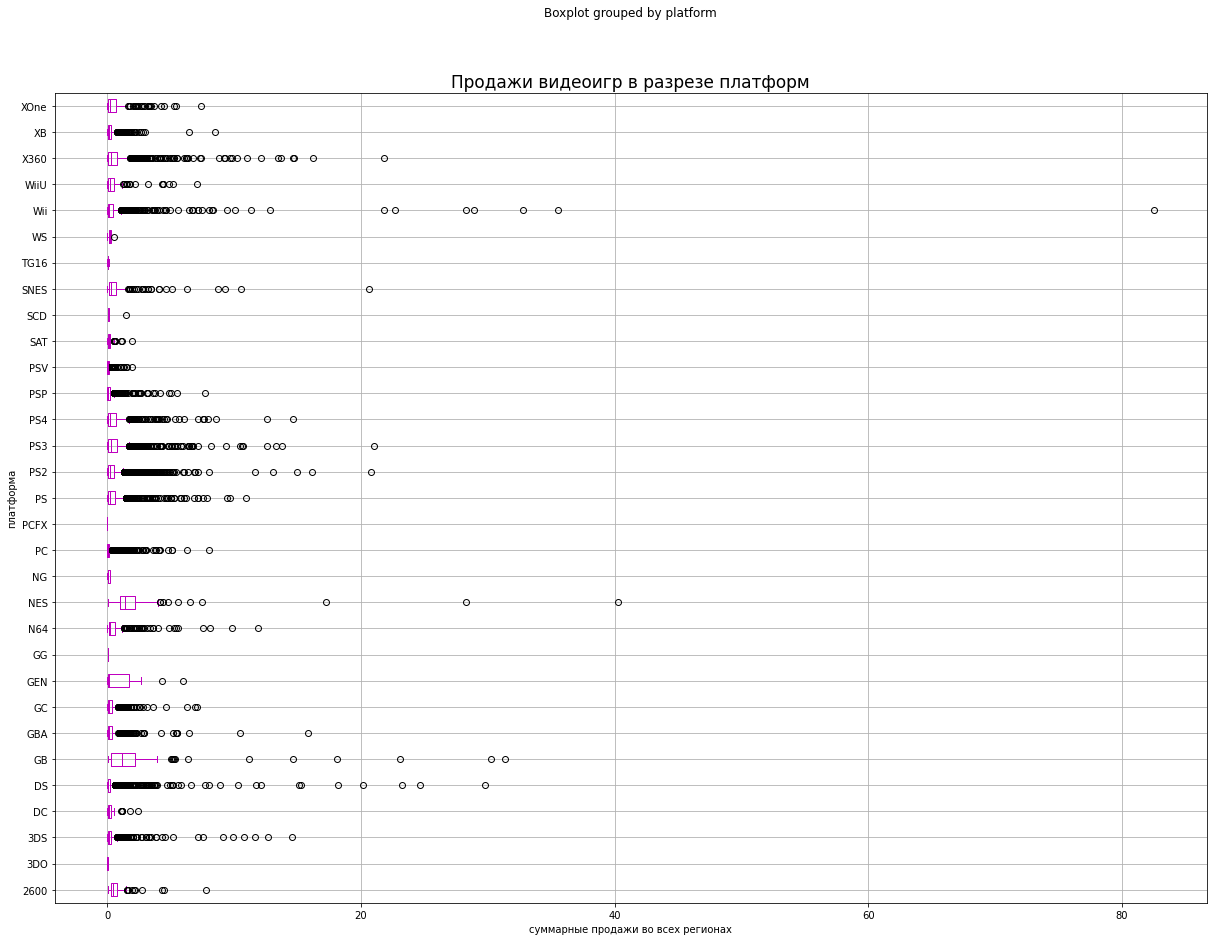

In [36]:
# построим график 'ящик с усами' по количеству продажам игр в разрезе платформ
fig, ax = plt.subplots(figsize = (20,15))
data.boxplot('total_sales', 'platform', vert = False, ax=ax, color='m')
ax.set_xlabel('суммарные продажи во всех регионах')
ax.set_ylabel('платформа')
ax.set_title('Продажи видеоигр в разрезе платформ',fontdict={'size':17})
#ax.set_xlim(0, 15)
plt.show()

In [37]:
platform_indicators = (data
 .pivot_table(index='platform', values='total_sales', aggfunc=['median','mean','min','max', 'std']))
platform_indicators.columns = ['median','mean','min','max', 'std']
platform_indicators.sort_values('std', ascending=False)

median      mean   min    max       std
platform                                         
GB         1.180  2.622990  0.06  31.38  5.390925
NES        1.375  2.561735  0.06  40.24  5.108012
Wii        0.190  0.692986  0.01  82.54  3.165022
SNES       0.320  0.836987  0.01  20.62  1.869469
X360       0.280  0.780227  0.01  21.82  1.632122
PS4        0.200  0.801378  0.01  14.63  1.609456
GEN        0.150  1.050000  0.03   6.02  1.490041
3DS        0.120  0.503535  0.01  14.60  1.441271
DS         0.110  0.378660  0.01  29.80  1.436359
PS3        0.280  0.713124  0.00  21.05  1.403065
N64        0.270  0.689905  0.01  11.90  1.322189
PS2        0.230  0.579953  0.00  20.81  1.138461
WiiU       0.220  0.559116  0.01   7.09  1.058836
PS         0.260  0.611412  0.01  10.95  1.056807
XOne       0.220  0.645020  0.01   7.39  1.036139
2600       0.480  0.745517  0.07   7.81  0.956160
GBA        0.160  0.385795  0.01  15.84  0.899654
GC         0.150  0.362970  0.01   7.06  0.693974
PC         0.050  0.267252  0.01   8.01  0.679745
SCD        0.065  0.310000  0.04   1.50  0.584055
XB         0.150  0.313288  0.01   8.48  0.539309
PSP        0.090  0.242691  0.01   7.68  0.522019
DC         0.135  0.306731  0.02   2.41  0.468660
SAT        0.120  0.194162  0.02   1.93  0.218092
PSV        0.050  0.125431  0.01   1.96  0.212341
WS         0.215  0.236667  0.03   0.51  0.159457
TG16       0.080  0.080000  0.02   0.14  0.084853
NG         0.100  0.120000  0.02   0.25  0.082241
3DO        0.020  0.033333  0.02   0.06  0.023094
GG         0.040  0.040000  0.04   0.04       NaN
PCFX       0.030  0.030000  0.03   0.03       NaN

Наблюдается достаточно большой разброс по количеству продаж, как в рамках одной платформы, так и при сравнении разных платформ.
Выбросами явялются успешные игры на конкретной платформе. Посмотрим игры с продажами свыше 30 млн. копий на всех платформах, это предполагаемые бестселлеры. 

In [38]:
# посмотрим игры в разрезе платформ
(data.query('total_sales >= 30')
 .loc[:, ['year_of_release', 'platform', 'genre', 'name', 'eu_sales','jp_sales','na_sales','other_sales','total_sales']]
 .pivot_table(index=['total_sales','name', 'genre', 'platform'], aggfunc='sum').sort_values('total_sales', ascending=False))

eu_sales  \
total_sales name                     genre        platform             
82.54       Wii Sports               Sports       Wii          28.96   
40.24       Super Mario Bros.        Platform     NES           3.58   
35.52       Mario Kart Wii           Racing       Wii          12.76   
32.77       Wii Sports Resort        Sports       Wii          10.93   
31.38       Pokemon Red/Pokemon Blue Role-Playing GB            8.89   
30.26       Tetris                   Puzzle       GB            2.26   

                                                            jp_sales  \
total_sales name                     genre        platform             
82.54       Wii Sports               Sports       Wii           3.77   
40.24       Super Mario Bros.        Platform     NES           6.81   
35.52       Mario Kart Wii           Racing       Wii           3.79   
32.77       Wii Sports Resort        Sports       Wii           3.28   
31.38       Pokemon Red/Pokemon Blue Role-Playing GB           10.22   
30.26       Tetris                   Puzzle       GB            4.22   

                                                            na_sales  \
total_sales name                     genre        platform             
82.54       Wii Sports               Sports       Wii          41.36   
40.24       Super Mario Bros.        Platform     NES          29.08   
35.52       Mario Kart Wii           Racing       Wii          15.68   
32.77       Wii Sports Resort        Sports       Wii          15.61   
31.38       Pokemon Red/Pokemon Blue Role-Playing GB           11.27   
30.26       Tetris                   Puzzle       GB           23.20   

                                                            other_sales  \
total_sales name                     genre        platform                
82.54       Wii Sports               Sports       Wii              8.45   
40.24       Super Mario Bros.        Platform     NES              0.77   
35.52       Mario Kart Wii           Racing       Wii              3.29   
32.77       Wii Sports Resort        Sports       Wii              2.95   
31.38       Pokemon Red/Pokemon Blue Role-Playing GB               1.00   
30.26       Tetris                   Puzzle       GB               0.58   

                                                            year_of_release  
total_sales name                     genre        platform                   
82.54       Wii Sports               Sports       Wii                  2006  
40.24       Super Mario Bros.        Platform     NES                  1985  
35.52       Mario Kart Wii           Racing       Wii                  2008  
32.77       Wii Sports Resort        Sports       Wii                  2009  
31.38       Pokemon Red/Pokemon Blue Role-Playing GB                   1996  
30.26       Tetris                   Puzzle       GB                   1989

Игры-бестселлеры с продажами более 30 млн. копий были выпущены в период 1985-2009гг. на платформах Wii, NES, GB.
Большая доля продаж приходилась на рынки Северной Америки и/или Европы, за исключением игры "Pokemon Red/Pokemon Blue" (по ней продажи примерно равны в Северной Америке, Европе и Японии).


Самая успешная игра для одной платформы (Wii) "Wii Sports" продана в количестве 82.54 млн. копий. Wii Sports была выпущена в 2006 году, относится к жанру Sports. Основной объем продаж был на территориях Северной Америки (41.36) и Европы (28.96).

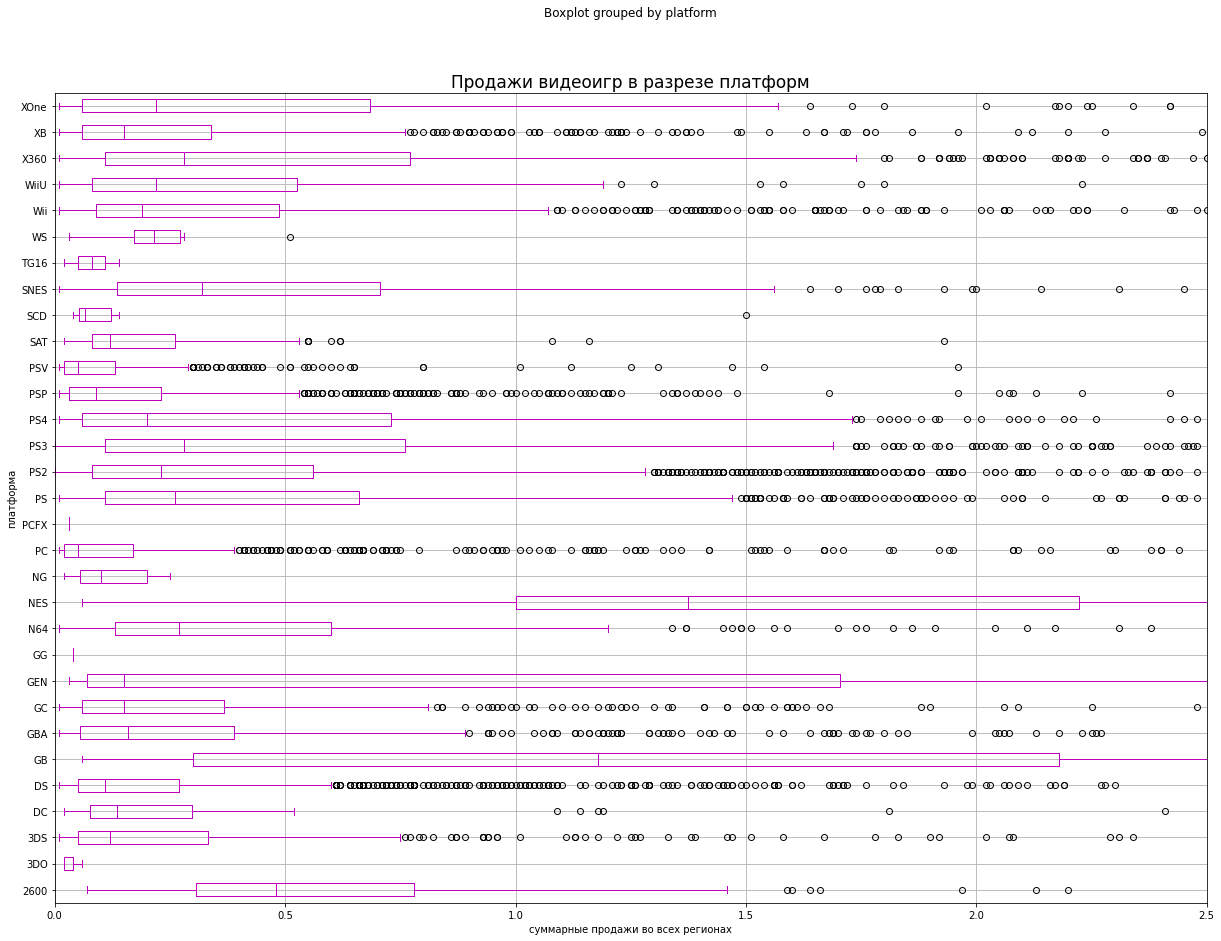

In [39]:
# масштабируем диаграмму, что подробнее рассмотреть боксплоты
fig, ax = plt.subplots(figsize = (20,15))
data.boxplot('total_sales', 'platform', vert = False, ax=ax, color='m')
ax.set_xlabel('суммарные продажи во всех регионах')
ax.set_ylabel('платформа')
ax.set_title('Продажи видеоигр в разрезе платформ',fontdict={'size':17})
ax.set_xlim(0, 2.5)
plt.show()

In [40]:
data.query('platform == "NES"')['total_sales'].describe()

count    98.000000
mean      2.561735
std       5.108012
min       0.060000
25%       1.000000
50%       1.375000
75%       2.222500
max      40.240000
Name: total_sales, dtype: float64

Практически у каждой платформы наблюдается сильный разброс по продажам различных игр, так как успешность игры зависит от многих факторов. Однако обратим внимание на платформу NES - межквартильный размах находится в диапазоне 1-2.2 млн. продаж. Это означает, что 50% выпущенных игр были успешными, очень хороший результат. Посмотрим в каком жанре были эти игры.

In [41]:
(data.query('platform == "NES" and total_sales >= 1 and total_sales <= 2.2225')
 .pivot_table(index ='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False))

total_sales
genre                    
Platform            18.92
Sports              13.56
Action               8.69
Puzzle               7.54
Shooter              6.35
Racing               5.62
Role-Playing         5.00
Misc                 3.59
Fighting             1.05

На первом месте по продажам жанр Platform (основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов), что не удивительно, так как платформа существовала в период 1983-1994.

### Анализ влияния отзывов пользователей и критиков на количество продаж (платформа PS4)

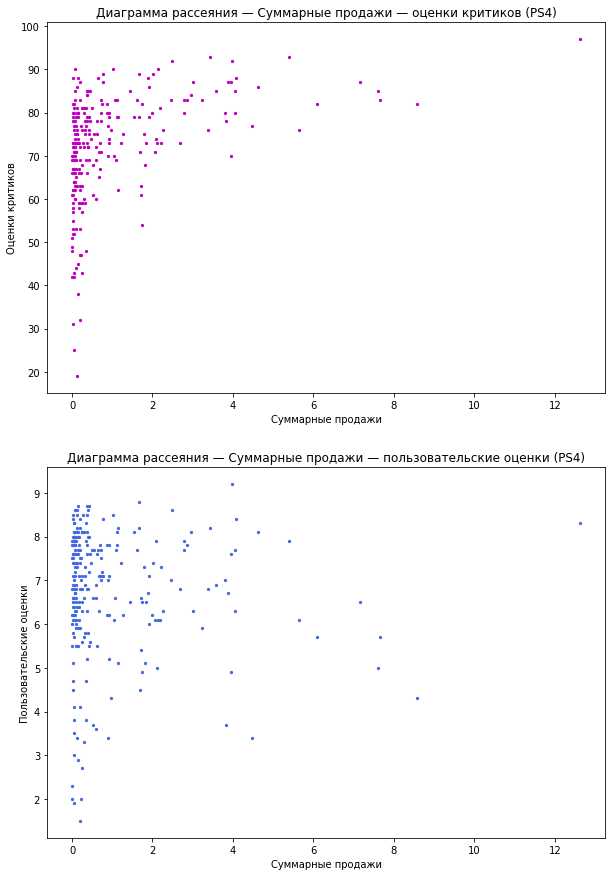

In [42]:
# построим диаграммы рассеяния по продажам и оценка рейтингов внутри платформы PS4
PS4_data = data_clean.loc[data_clean['platform'] == 'PS4',['total_sales', 'user_score', 'critic_score']]

fig, ax = plt.subplots(2, figsize=(10, 15))
ax[0].scatter(x = PS4_data['total_sales'], y = PS4_data['critic_score'], s = 5, c = 'm')
ax[0].set_xlabel("Суммарные продажи")
ax[0].set_ylabel("Оценки критиков")
ax[0].set_title('Диаграмма рассеяния — Суммарные продажи — оценки критиков (PS4)')

ax[1].scatter(x = PS4_data['total_sales'], y = PS4_data['user_score'], s = 5, c = 'royalblue')
ax[1].set_xlabel("Суммарные продажи")
ax[1].set_ylabel("Пользовательские оценки")
ax[1].set_title('Диаграмма рассеяния — Суммарные продажи — пользовательские оценки (PS4)')
plt.show()

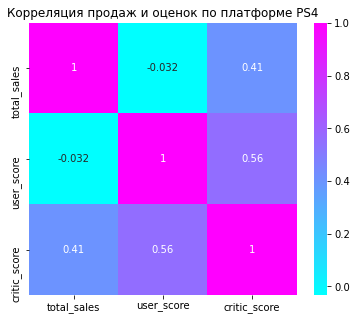

In [43]:
# посчитаем корреляцию продаж и оценок
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap((data_clean.loc[data_clean['platform'] == 'PS4',['total_sales', 'user_score', 'critic_score']])
            .corr(), annot=True, cmap='cool')
plt.title("Корреляция продаж и оценок по платформе PS4", fontsize =12)
plt.show()

Количество продаж практически не имеет корреляцию с оценкой критиков (-0.032), а с оценкой пользователей наблюдается слабая корреляция (0.41).

### Анализ влияния отзывов пользователей и критиков на количество продаж (прочие платформы)

Проанализируем пять успешных платформ за весь период (1980-2016гг.):
- PS2
- PS3
- DS
- Wii
- X360

In [44]:
for pl in ['PS2', 'PS3', 'Wii', 'X360', 'DS']:
    print(pl)
    data_goal = data.query('platform == @pl')
    print(f'Корреляция между оценкой критиков и продажами: {data_goal.critic_score.corr(data_goal.total_sales):.2}')
    print(f'Корреляция между оценкой пользователей и продажами: {data_goal.user_score.corr(data_goal.total_sales):.2}')
    print(f'Корреляция между оценками критиков и пользователей: {data_goal.critic_score.corr(data_goal.user_score):.2}')
    print('**' * 30)

PS2
Корреляция между оценкой критиков и продажами: 0.39
Корреляция между оценкой пользователей и продажами: 0.18
Корреляция между оценками критиков и пользователей: 0.57
************************************************************
PS3
Корреляция между оценкой критиков и продажами: 0.43
Корреляция между оценкой пользователей и продажами: 0.13
Корреляция между оценками критиков и пользователей: 0.63
************************************************************
Wii
Корреляция между оценкой критиков и продажами: 0.18
Корреляция между оценкой пользователей и продажами: 0.11
Корреляция между оценками критиков и пользователей: 0.69
************************************************************
X360
Корреляция между оценкой критиков и продажами: 0.39
Корреляция между оценкой пользователей и продажами: 0.11
Корреляция между оценками критиков и пользователей: 0.63
************************************************************
DS
Корреляция между оценкой критиков и продажами: 0.24
Корреляция между оце

Результат зависимости по различным платформам отличается, но определенный закономерности всетаки есть:
- корреляция между оценкой критиков и продажами слабая (0.18 - 0.43);
- корреляция между оценкой пользователей и продажами не наблюдается (0.11 - 0.18);
- наблюдается средняя зависимость между оценками пользователей и критиков (0.57 - 0.69)

Результат по анализиуемым платформам совпадает с результатом оценки по платформе из ТОП-5 (PS4).

### Определение наиболее прибыльных жанров видеоигр

In [45]:
# построим сводную таблицу по продажам в разрезе жанров
# рассчитаем количество выпущенных игр, суммарный объем проданных копий и медиану по количеству продаж
genre_sales = data_clean.pivot_table(index='genre', values=['total_sales'], aggfunc=['count', 'sum', 'median'])
genre_sales.columns = ['game_count', 'sales_sum', 'median']
genre_sales = genre_sales.sort_values('sales_sum', ascending=False)
genre_sales.head() # топ-5 жанров

game_count  sales_sum  median
genre                                      
Action               766     321.87   0.110
Shooter              187     232.98   0.450
Sports               214     150.65   0.240
Role-Playing         292     145.89   0.125
Misc                 155      62.82   0.100

In [46]:
# построим диаграмму рассеивания (пузырьковую) по полученным данным
fig = px.scatter(genre_sales, x='sales_sum', y='game_count', color=genre_sales.index, size='median', 
                 title='Распределение жанров в зависимости от количества выпущенных игр и проданных копий за 2013-2016гг.')
fig.show()

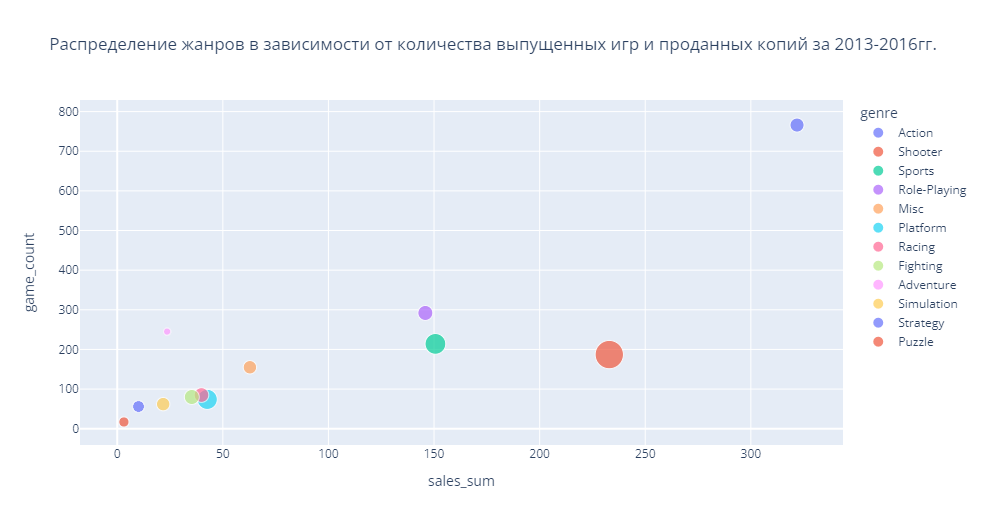

Из диаграммы видно, что за 2013-2016гг. в жанре Action было выпущено и продано наибольшее количество игр, однако медианное значение по количеству проданных копий на одну игру не самое большое.
Лидером по медианному количеству продаж на одну игру является жанр Shooter. По суммарному количеству продаж данный жанр на 2-м месте (после Action).

Самыми не популярными жанрами по количеству выпущенных игр и продажам являются Strategy и Puzzle.

Посмотрим на диаграмму размаха для выбора жанра, который успешен в большем количестве случаев.

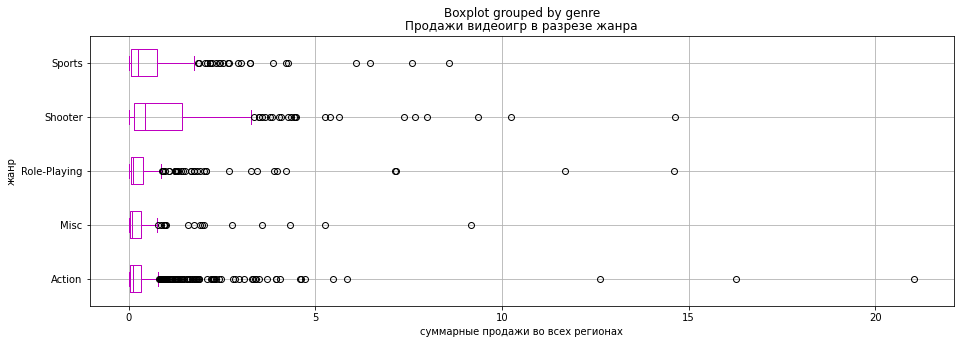

In [47]:
# построим диаграмму размаха продаж в разрезе платформ
genre_top5 = ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']
fig, ax = plt.subplots(figsize = (15,5))
data_clean.query('genre in @genre_top5').boxplot('total_sales', 'genre', vert = False, ax=ax, color='m')
ax.set_xlabel('суммарные продажи во всех регионах')
ax.set_ylabel('жанр')
ax.set_title('Продажи видеоигр в разрезе жанра',fontdict={'size':12})
plt.show()

Посмотрим на боксплот ТОП-5 жанров по суммарным продажам. 
Из диаграммы видно, что жанр "Action", который находится на 1-м месте, имеет очень много выбросов.
Посмотрим масштабированный боксплот, чтобы оценить межквартильный размах и медиану по жанрам.

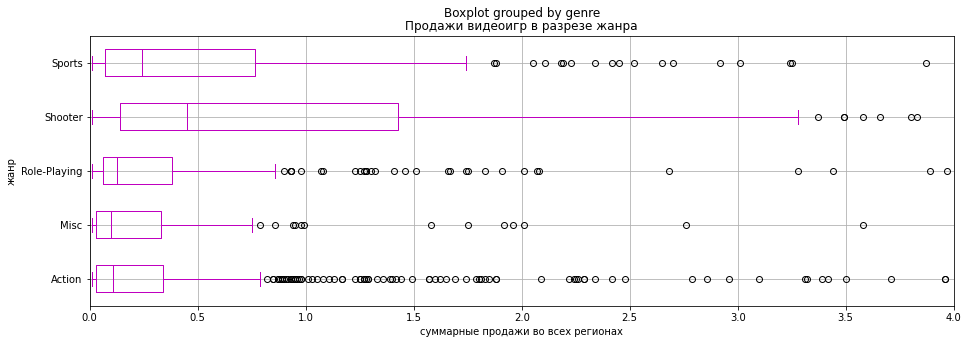

In [48]:
fig, ax = plt.subplots(figsize = (15,5))
data_clean.query('genre in @genre_top5').boxplot('total_sales', 'genre', vert = False, ax=ax, color='m')
ax.set_xlabel('суммарные продажи во всех регионах')
ax.set_ylabel('жанр')
ax.set_title('Продажи видеоигр в разрезе жанра',fontdict={'size':12})
ax.set_xlim(0, 4)
plt.show()

In [49]:
data_clean.query('genre == "Shooter"')['total_sales'].describe()

count    187.000000
mean       1.245882
std        2.014107
min        0.010000
25%        0.140000
50%        0.450000
75%        1.425000
max       14.630000
Name: total_sales, dtype: float64

In [50]:
data_clean.query('genre == "Action"')['total_sales'].describe()

count    766.000000
mean       0.420196
std        1.253909
min        0.010000
25%        0.030000
50%        0.110000
75%        0.337500
max       21.050000
Name: total_sales, dtype: float64

In [51]:
data_clean.query('genre == "Sports"')['total_sales'].describe()

count    214.000000
mean       0.703972
std        1.219237
min        0.010000
25%        0.070000
50%        0.240000
75%        0.765000
max        8.580000
Name: total_sales, dtype: float64

Несмотря на то, что жанр Action на первом месте по суммарным продажам, 50% игр этого жанра находятся в диапазоне продаж 0.03 - 0.34 млн. копий (медиана - 0.11 млн.)
Shooter наиболее стабильный жанр по объему продаж, так как 50% игр в жанре находится в диапазоне продаж 0.14 - 1.4 млн. копий, а медиана в размере 0.45 млн. 
На втором месте по стабильным объемам продаж находится жанр Sports (50% в диапазоне 0.07 - 0.77 млн. копий, медиана - 0.24 млн.).

### Вывод по исследовательскому анализу данных

1. **Динамика развития индустрии видеоигр** по имеющимся данным следующая:
    - В период с 1980г. по 1993г. в индустрии видеоигр наблюдалась стагнация. 
    - С 1994г. по 2005г. наблюдался активный рост количества выпускаемых игр, а основной пик выпуска приходится на период с 2006г. по 2011г. 
    - Затем наблюдается достаточно резкий спад (практически в 2 раза) и с 2012г. по 2016г. игры выпускались в относительно одинаковом количестве (500-600 игр в год).
2. **Самая успешная игра** для одной платформы (Wii) "Wii Sports" продана в количестве 82.54 млн. копий. Основной объем продаж был на территориях Северной Америки (41.36) и Европы (28.96). 
3. **Платформа-лидер** по количеству продаж за все анализируемы годы - PS2 в период с 2002 по 2004 гг. 
4. **Жизненный цикл** платформ составляет примерно 10-12 лет, при этом пик продаж игр приходится примерно на середину жизненного цикла конкретной платформы, то есть на 4-7 год существования платформы.
5. **Потенциально прибыльными в 2017г.** являются следующие платформы (их срок существования в 2017г. совпадает с серединой жизненного цикла платформ):
    - 3DS
    - PS4
    - PSV
    - WiiU
    - XOne
6. **Актуальным периодом для прогноза на 2017 год возьмем период с 2013г. по 2016г.** 2013г. - это период, в который все выделенные платформы уже запустили продажи.
7. По результатам анализа влияния оценок критиков и пользователей получены следующие результаты:
    - зависимость между оценкой критиков и продажами слабая;
    - зависимость между оценкой пользователей и продажами не наблюдается.
8. По результатам анализа жанров видеоигр за период с 2013г. по 2016г. можно сказать, что **самым перспективным жанром по соотношению стабильности и объемов продаж является Shooter.**

## Портрет пользователя каждого региона

### Самые популярные игровые платформы

#### ТОП-5 платформ Северной Америки

In [52]:
# определим топ-5 популярных платформ в Северной Америке
na_top_platform = (data_clean.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')
                   .sort_values('na_sales', ascending=False))
na_top_platform.columns = ['na_sales', 'total_sales']
na_top_platform['share_in_total'] = (na_top_platform['na_sales']/na_top_platform['total_sales'])
na_top_platform = na_top_platform.head(5)
na_top_platform_style = na_top_platform.style.format({'na_sales':"{:.2f}", 'total_sales':"{:.2f}",'share_in_total': "{:.2%}"})
print('ТОП-5 популярных платформ в Северной Америке')
display(na_top_platform_style)

ТОП-5 популярных платформ в Северной Америке


За период 2013-2016гг. наиболее популярными платформами (по количеству продаж) в Северной Америке являются:
- PS4 (доля от всех продаж платформы, приходящаяся на регион - 34.62%)
- XOne (доля от всех продаж платформы, приходящаяся на регион - 58.45%)
- X360 (доля от всех продаж платформы, приходящаяся на регион - 59.69%)
- PS3 (доля от всех продаж платформы, приходящаяся на регион - 35.00%)
- 3DS (доля от всех продаж платформы, приходящаяся на регион - 26.67%)

Обратим внимание, что Северная Америка является первостепенным рынком сбыта у XOne и X360. Практически 60% продаж игр на данных платформах приходятся именно на этот регион.

In [53]:
# посмотрим как распределялись продажи на платформах ТОП-5 по годам
na_top_platform_year = (data_clean.query('platform in @na_top_platform.index')
      .pivot_table(index='year_of_release', values='na_sales', columns='platform', aggfunc='sum'))
na_top_platform_year.columns = ['3DS', 'PS3', 'PS4', 'X360', 'XOne']

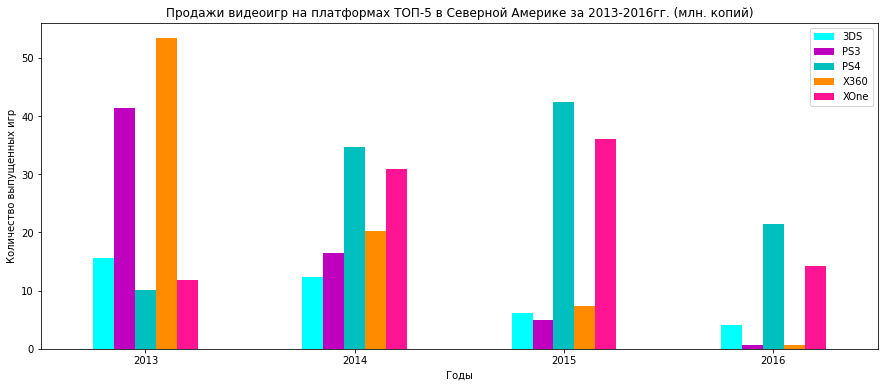

In [54]:
ax = na_top_platform_year.plot.bar(rot=0, color=['aqua','m','c','darkorange', 'deeppink'], figsize=(15,6))
ax.set_xlabel('Годы')
ax.set_ylabel("Количество выпущенных игр")
ax.set_title('Продажи видеоигр на платформах ТОП-5 в Северной Америке за 2013-2016гг. (млн. копий)')
plt.show()

Из диаграммы видно, что наиболее перспективными платформами в Северной Америке являются XOne и PS4. Продажи игр на этих платформах с каждым годом увеличиваются (2016 год спад, но возможно это связано с неполнотой данных за этот год). Учитывая [жизненный цикл](#life) платформ, в ближайшие несколько лет будет наблюдаться пик продаж на данных платформах, который приходится на 4-7 год от запуска продаж.

Платформы PS3 и X360 теряют доли рынка, продажи с каждым годом уменьшаются, так как платформы существуют уже более 10 лет и их [жизненный цикл](#life) подходит к концу.

Платформа 3DS существует около 5 лет, как раз на этот период обычно приходится расцвет платформы, но в Северной Америке этого не произошло. Возможно по причине отсутствия популярности этой платформы в конкретном регионе или не успешности платформы в целом по глобальному рынку.

#### ТОП-5 платформ Европы

In [55]:
# определим топ-5 популярных платформ в Европе
eu_top_platform = (data_clean.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')
                   .sort_values('eu_sales', ascending=False))
eu_top_platform.columns = ['eu_sales', 'total_sales']
eu_top_platform['share_in_total'] = (eu_top_platform['eu_sales']/eu_top_platform['total_sales'])
eu_top_platform = eu_top_platform.head(5)
eu_top_platform = eu_top_platform.style.format({'eu_sales':"{:.2f}", 'total_sales':"{:.2f}",'share_in_total': "{:.2%}"})
print('ТОП-5 популярных платформ в Европе')
display(eu_top_platform)

ТОП-5 популярных платформ в Европе


За период 2013-2016гг. наиболее популярными платформами (по количеству продаж) в Европе являются:
- PS4 (доля от всех продаж платформы, приходящаяся на регион - 44.91%)
- PS3 (доля от всех продаж платформы, приходящаяся на регион - 37.38%)
- XOne (доля от всех продаж платформы, приходящаяся на регион - 32.38%)
- X360 (доля от всех продаж платформы, приходящаяся на регион - 31.08%)
- 3DS (доля от всех продаж платформы, приходящаяся на регион - 21.61%)

Стоит отметить, что Европа является крупнейшим рынком сбыта у PS4. 45% продаж платформы приходится на этот регион.

Платформы ТОП-5 Европы по содержанию аналогичны ТОП-5 платформ Северной Америки, отличаются лишь места в рейтинге по продажам.

In [56]:
# посмотрим как распределялись продажи на платформах ТОП-5 по годам
eu_top_platform_year = (data_clean.query('platform in @eu_top_platform.index')
      .pivot_table(index='year_of_release', values='eu_sales', columns='platform', aggfunc='sum'))

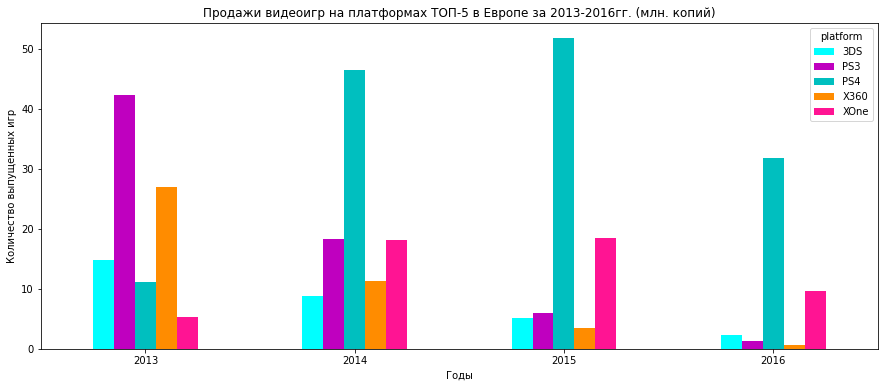

In [57]:
ax = eu_top_platform_year.plot.bar(rot=0, color=['aqua','m','c','darkorange', 'deeppink'], figsize=(15,6))
ax.set_xlabel('Годы')
ax.set_ylabel("Количество выпущенных игр")
ax.set_title('Продажи видеоигр на платформах ТОП-5 в Европе за 2013-2016гг. (млн. копий)')
plt.show()

В Европе несомненным лидером по продажам является PS4 - рост продаж наблюдается с каждым годом, кроме 2016г. (данные по нему могут быть не полными). И, опираясь на длительность [жизненного цикла](#life) платформ, есть основания полагать, что и в 2017г. PS4 не потеряет лидирующих позиций.

XOne тоже показывает положительную динамику на рынке Европы, хоть и не такую масштабную, как PS4.

Платформы PS3, X360 также как и в Северной Америке теряют доли рынка, продажи с каждым годом уменьшаются, так как платформы существуют уже более 10 лет и их [жизненный цикл](#life) подходит к концу.

3DS также не отличается популярностью в Европе.

#### ТОП-5 платформ Японии

In [58]:
# определим топ-5 популярных платформ в Японии
jp_top_platform = (data_clean.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')
                   .sort_values('jp_sales', ascending=False))
jp_top_platform.columns = ['jp_sales', 'total_sales']
jp_top_platform['share_in_total'] = (jp_top_platform['jp_sales']/jp_top_platform['total_sales'])
jp_top_platform = jp_top_platform.head(5)
jp_top_platform = jp_top_platform.style.format({'jp_sales':"{:.2f}", 'total_sales':"{:.2f}",'share_in_total': "{:.2%}"})
print('ТОП-5 популярных платформ в Японии')
display(jp_top_platform)

ТОП-5 популярных платформ в Японии


За период 2013-2016гг. наиболее популярными платформами (по количеству продаж) в Японии являются:
- 3DS (доля от всех продаж платформы, приходящаяся на регион - 47.34%)	
- PS3 (доля от всех продаж платформы, приходящаяся на регион - 12.87%)
- PSV (доля от всех продаж платформы, приходящаяся на регион - 56.35%)
- PS4 (доля от всех продаж платформы, приходящаяся на регион - 5.08%)
- WiiU (доля от всех продаж платформы, приходящаяся на регион - 16.83%)

Платформы 3DS и PSV пользуются спросом на внутреннем рынке Японии (47% и 56% от общих продаж по платформам).

In [59]:
# посмотрим как распределялись продажи на платформах ТОП-5 по годам
jp_top_platform_year = (data_clean.query('platform in @jp_top_platform.index')
      .pivot_table(index='year_of_release', values='jp_sales', columns='platform', aggfunc='sum'))

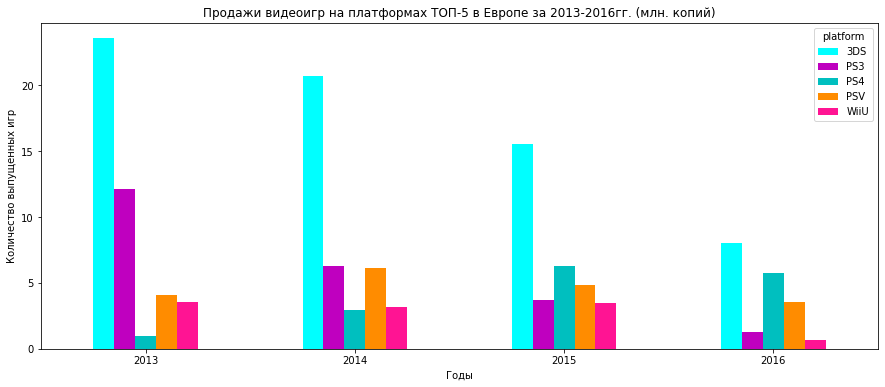

In [60]:
ax = jp_top_platform_year.plot.bar(rot=0, color=['aqua','m','c','darkorange', 'deeppink'], figsize=(15,6))
ax.set_xlabel('Годы')
ax.set_ylabel("Количество выпущенных игр")
ax.set_title('Продажи видеоигр на платформах ТОП-5 в Европе за 2013-2016гг. (млн. копий)')
plt.show()

Несмотря на лидирующие позиции по суммарным продажам, 3DS с каждым годом теряет свои позиции.
На смену PS3 (отрицательная динамика продаж по годам) приходит PS4, продажи на платформе PS4 имеют положительную динамику с 2013г. по 2015г. В 2016г. продажи PS4 практически на уровне 2015г., но год может быть с неполными данными, а результат по итогу 2016г. больше отраженного на данный момент.

Продажи игр на платформах PSV и WiiU относительно стабильны, с отрицательной динамикой в неполном 2016г.

Стоит отметить, что предпочтения по платформам в Японии значительно отличаются от Европы и СА. 

#### Вывод о популярных платформах в Северной Америке, Европе и Японии

Подготовим данные для анализа долей жанров по анализируемым регионам.

In [61]:
# функция для группировки платформ СА
def platform_group_na(row):
    try:
        if row['platform'] in na_top_platform.index:
            return row['platform']
        else:
            return 'Other_platform'
    except: 'ошибка'

In [62]:
# создадим столбец с ТОП-5 платформ СА 
data_clean['platform_group_na'] = data_clean.apply(platform_group_na, axis=1)

In [63]:
# функция для группировки платформ Европа
def platform_group_eu(row):
    try:
        if row['platform'] in eu_top_platform.index:
            return row['platform']
        else:
            return 'Other_platform'
    except: 'ошибка'

In [64]:
# создадим столбец с ТОП-5 платформ Европы 
data_clean['platform_group_eu'] = data_clean.apply(platform_group_eu, axis=1)

In [65]:
# функция для группировки платформ Японии
def platform_group_jp(row):
    try:
        if row['platform'] in jp_top_platform.index:
            return row['platform']
        else:
            return 'Other_platform'
    except: 'ошибка'

In [66]:
# создадим столбец с ТОП-5 платформ Японии 
data_clean['platform_group_jp'] = data_clean.apply(platform_group_jp, axis=1)

In [67]:
# подготовим группировку данных для построения диаграмм
# СА
na_top_platform = (data_clean.pivot_table(index='platform_group_na', values='na_sales', aggfunc='sum'))
na_top_platform.columns = ['na_sales']
# Европа
eu_top_platform = (data_clean.pivot_table(index='platform_group_eu', values='eu_sales', aggfunc='sum'))
eu_top_platform.columns = ['eu_sales']
# Япония
jp_top_platform = (data_clean.pivot_table(index='platform_group_jp', values='jp_sales', aggfunc='sum'))
jp_top_platform.columns = ['jp_sales']

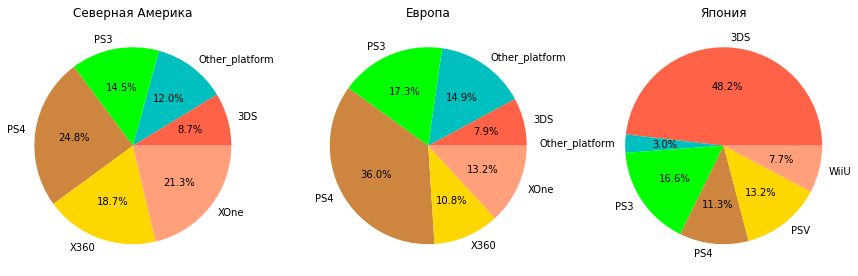

In [68]:
# построим круговые диаграммы по платформам
fig, axs = plt.subplots(1, 3, figsize = (15,15))
pallete = ['tomato','c', 'lime', 'peru', 'gold', 'lightsalmon' ]
axs[0].pie(na_top_platform['na_sales'], labels=na_top_platform.index, autopct='%1.1f%%', colors = pallete)
axs[0].set_title('Северная Америка')

axs[1].pie(eu_top_platform['eu_sales'], labels=eu_top_platform.index, autopct='%1.1f%%', colors = pallete)
axs[1].set_title('Европа')

axs[2].pie(jp_top_platform['jp_sales'], labels=jp_top_platform.index, autopct='%1.1f%%', colors = pallete)
axs[2].set_title('Япония')

plt.show()

PS4 является лидером по доле продаж в Европе (36.0%) и Северной Америке (24.8%), кроме того данная платформа обладает в этих регионах положительной динамикой - с 2013 по 2015гг. продажи на платформе растут.

В Японии у PS4 тоже положительная динамика, но доля рынка на текущий момент неболшая (11.3%). Несмотря на отрицательную динамику продаж по годам, несомненным лидером на японском рынке видеоигр является платформа 3DS (48.2%).

### Самые популярные жанры видеоигр

####  ТОП-5 жанров Северной Америки

In [69]:
# определим топ-5 популярных жанров в Северной Америке
na_top_genre = (data_clean.pivot_table(index='genre', values=['na_sales', 'total_sales'], aggfunc='sum')
                   .sort_values('na_sales', ascending=False))
na_top_genre.columns = ['na_sales', 'total_sales']
na_top_genre['share_in_total'] = (na_top_genre['na_sales']/na_top_genre['total_sales'])
na_top_genre = na_top_genre.head(5)
na_top_genre_style = na_top_genre.style.format({'na_sales':"{:.2f}", 'total_sales':"{:.2f}",'share_in_total': "{:.2%}"})
print('ТОП-5 популярных жанров в Северной Америке')
display(na_top_genre_style)

ТОП-5 популярных жанров в Северной Америке


Обратим внимание, что практически половина всех продаж игр в жанре Shooter (47.10%) за 2013-2016гг. приходится именно на Северную Америку.

In [70]:
 # посмотрим как распределялись продажи по жанрам ТОП-5 по годам
na_top_genre_year = (data_clean.query('genre in @na_top_genre.index')
                        .pivot_table(index='genre', values='na_sales', columns='year_of_release', aggfunc='sum'))

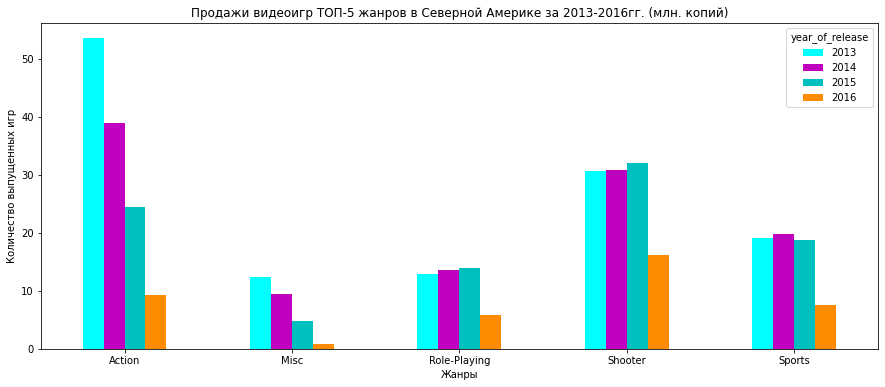

In [71]:
ax = na_top_genre_year.plot.bar(rot=0, color=['aqua','m','c','darkorange', 'deeppink'], figsize=(15,6))
ax.set_xlabel('Жанры')
ax.set_ylabel("Количество выпущенных игр")
ax.set_title('Продажи видеоигр ТОП-5 жанров в Северной Америке за 2013-2016гг. (млн. копий)')
plt.show()

По диаграмме видно, что самый популярный жанр ТОП-5 (Action) с каждым годом теряет позиции в Северной Америке, тем не менее, продажи пока остаются на достаточно высоком уровне (смотрим с 2013 по 2015гг., 2016 год возможно не с полными данными). 

Жанры Role-Plaing и Sports остаются примерно на одном уровне продаж в течении анализируемого периода. Жанр Misc с каждым годом теряет продажи, скорее всего жанр скоро уйдет из ТОП-5 в Северной Америке.

Shooter в Северной Америке отличается стабильностью на протяжении 3-х лет.

#### ТОП-5 жанров Европы

In [72]:
# определим топ-5 популярных жанров в Европе
eu_top_genre = (data_clean.pivot_table(index='genre', values=['eu_sales', 'total_sales'], aggfunc='sum')
                   .sort_values('eu_sales', ascending=False))
eu_top_genre.columns = ['eu_sales', 'total_sales']
eu_top_genre['share_in_total'] = (eu_top_genre['eu_sales']/eu_top_genre['total_sales'])
eu_top_genre = eu_top_genre.head(5)
eu_top_genre_style = eu_top_genre.style.format({'eu_sales':"{:.2f}", 'total_sales':"{:.2f}",'share_in_total': "{:.2%}"})
print('ТОП-5 популярных жанров в Европе')
display(eu_top_genre_style)

ТОП-5 популярных жанров в Европе


Наиболее популярные жанры в Европе (по убыванию популярности):
- Action
- Shooter	
- Sports	
- Role-Playing	
- Racing	

ТОП-5 жанров по суммарным продажам в Европе практически идентичны с ТОП-5 Северной Америке, за исключением последнего места (в Европе это Racing, а в СА Misc).

Обратим внимание, что половина всех продаж игр в жанре Racing (50.61%) за 2013-2016гг. приходится именно на Европу.

In [73]:
# посмотрим как распределялись продажи по жанрам ТОП-5 по годам
eu_top_genre_year = (data_clean.query('genre in @eu_top_genre.index')
                        .pivot_table(index= 'genre', values='eu_sales', columns='year_of_release', aggfunc='sum'))

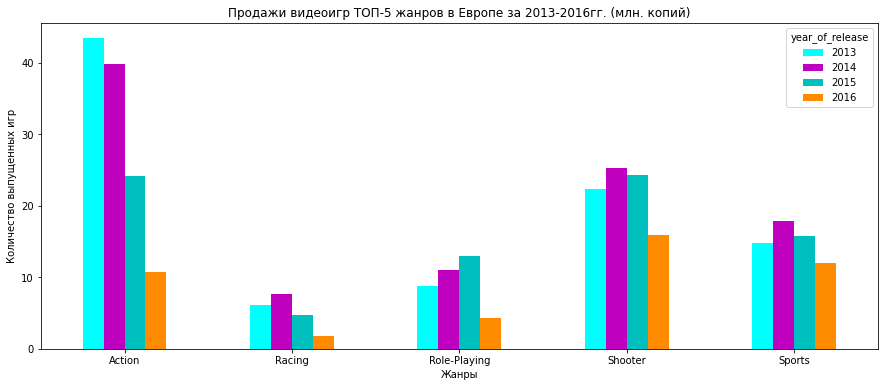

In [74]:
ax = eu_top_genre_year.plot.bar(rot=0, color=['aqua','m','c','darkorange', 'deeppink'], figsize=(15,6))
ax.set_xlabel('Жанры')
ax.set_ylabel("Количество выпущенных игр")
ax.set_title('Продажи видеоигр ТОП-5 жанров в Европе за 2013-2016гг. (млн. копий)')
plt.show()

Приверженность к определенным жанрам в Европе отличается относительной стабильностью по годам (с 2013г. по 2015г., 2016г. может быть не полным), за исключением жанра Action, он теряет свою популярность с каждым годом, также как и в Северной Америке.

#### ТОП-5 жанров Японии

In [75]:
# определим топ-5 популярных жанров в Японии
jp_top_genre = (data_clean.pivot_table(index='genre', values=['jp_sales', 'total_sales'], aggfunc='sum')
                   .sort_values('jp_sales', ascending=False))
jp_top_genre.columns = ['jp_sales', 'total_sales']
jp_top_genre['share_in_total'] = (jp_top_genre['jp_sales']/jp_top_genre['total_sales'])
jp_top_genre = jp_top_genre.head(5)
jp_top_genre_style = jp_top_genre.style.format({'jp_sales':"{:.2f}", 'total_sales':"{:.2f}",'share_in_total': "{:.2%}"})
print('ТОП-5 популярных жанров в Японии')
display(jp_top_genre_style)

ТОП-5 популярных жанров в Японии


Наиболее популярные жанры в Японии (по убыванию популярности):
- Role-Playing
- Action
- Misc
- Fighting
- Shooter		

ТОП-5 жанров по суммарным продажам в Японии частично совпадает с ТОП-5 Северной Америке и Европы по содержанию, однако позиции жанров отличаются. Первые и последние места ТОП-5 противоположны - в Японии на первом месте ролевые игры (Role-Playing), на пятом Shooter, в Европе и СА Shooter наоборот занимает одну из первых позиций, а ролевые игры не так популярны.

In [76]:
# посмотрим как распределялись продажи по жанрам ТОП-5 по годам
jp_top_genre_year = (data_clean.query('genre in @jp_top_genre.index')
                        .pivot_table(index='genre', values='jp_sales', columns='year_of_release', aggfunc='sum'))

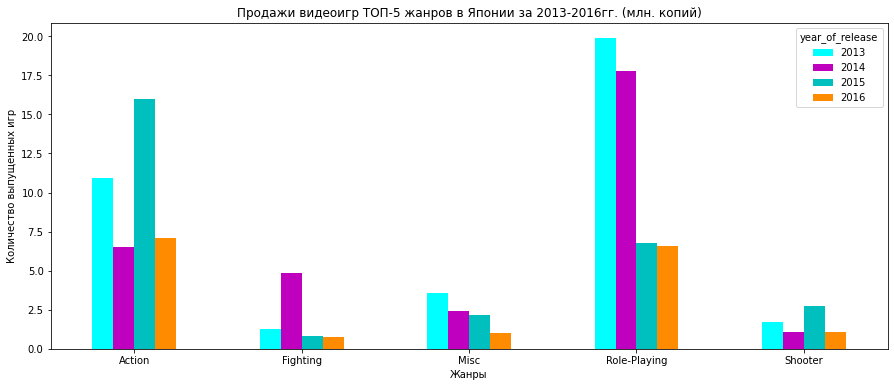

In [77]:
ax = jp_top_genre_year.plot.bar(rot=0, color=['aqua','m','c','darkorange', 'deeppink'], figsize=(15,6))
ax.set_xlabel('Жанры')
ax.set_ylabel("Количество выпущенных игр")
ax.set_title('Продажи видеоигр ТОП-5 жанров в Японии за 2013-2016гг. (млн. копий)')
plt.show()

Динамика продаж по жанрам отличается от Европы и СА. В то время, как в Европы и СА Action имеет отрицательную динамику по годам, в Японии этот жанр показывает значительный рост в 2015г., а так как в 2016г. данные могут быть не полными, то сложно сказать был ли рост связан с развитием жанра в целом или с успешностью конкретной игры на данном рынке.

Жанр-лидер продаж в Японии (Role-Playing) с каждым годом теряет свои позиции.

####  Вывод о популярных жанрах видеоигр в Северной Америке, Европе и Японии

In [78]:
# жанры Северной Америки
def genre_group_na(row):
    try:
        if row['genre'] in na_top_genre.index:
            return row['genre']
        else:
            return 'Other_genre'
    except: 'ошибка'

In [79]:
# создадим столбец с ТОП-5 жанров Северной Америки 
data_clean['genre_group_na'] = data_clean.apply(genre_group_na, axis=1)

In [80]:
# жанры Европы
def genre_group_eu(row):
    try:
        if row['genre'] in eu_top_genre.index:
            return row['genre']
        else:
            return 'Other_genre'
    except: 'ошибка'

In [81]:
# создадим столбец с ТОП-5 жанров Европы 
data_clean['genre_group_eu'] = data_clean.apply(genre_group_eu, axis=1)

In [82]:
# жанры Японии
def genre_group_jp(row):
    try:
        if row['genre'] in jp_top_genre.index:
            return row['genre']
        else:
            return 'Other_genre'
    except: 'ошибка'

In [83]:
# создадим столбец с ТОП-5 жанров Японии 
data_clean['genre_group_jp'] = data_clean.apply(genre_group_jp, axis=1)

In [84]:
# подготовим группировку данных для построения диаграмм
# СА
na_top_genre = (data_clean.pivot_table(index='genre_group_na', values='na_sales', aggfunc='sum'))
na_top_genre.columns = ['na_sales']
# Европа
eu_top_genre = (data_clean.pivot_table(index='genre_group_eu', values='eu_sales', aggfunc='sum'))
eu_top_genre.columns = ['eu_sales']
# Япония
jp_top_genre = (data_clean.pivot_table(index='genre_group_jp', values='jp_sales', aggfunc='sum'))
jp_top_genre.columns = ['jp_sales']

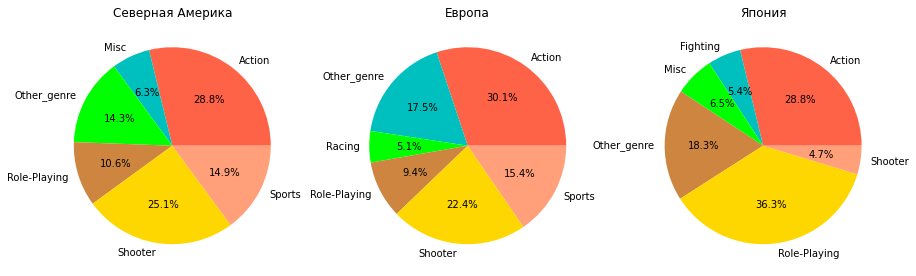

In [85]:
fig, axs = plt.subplots(1, 3, figsize = (15,15))
pallete = ['tomato','c', 'lime', 'peru', 'gold', 'lightsalmon' ]
ax.set_title('Продажи видеоигр в разрезе жанра')
axs[0].pie(na_top_genre['na_sales'], labels=na_top_genre.index, autopct='%1.1f%%', colors = pallete)
axs[0].set_title('Северная Америка')

axs[1].pie(eu_top_genre['eu_sales'], labels=eu_top_genre.index, autopct='%1.1f%%', colors = pallete)
axs[1].set_title('Европа')

axs[2].pie(jp_top_genre['jp_sales'], labels=jp_top_genre.index, autopct='%1.1f%%', colors = pallete)
axs[2].set_title('Япония')
plt.show()

Жанр Action является лидером по доле продаж во СА и Европе, в Японии доля жанра на втором месте с небольшой разницей. Но при детальном рассмотрении можно заметить:
1. В Северной Америке и Европе жанр с каждым годом теряет долю рынка.
2. В Японии динамика по годам выглядит нестабильно - отмечаются резкие скачки продаж, предположительно связанные с выпуском конкретных успешных игр.

Вторым по объему продаж в Северной Америке и Европе является жанр Shooter (25.1% и 22.4% соответственно). Динамику жанра по годам можно охарактеризовать как стабильную.

Рынок видеоигр Японии специфичен - структура по жанрам отличается, как от общемирового, так и от Северной Америки и Европы. На первом месте в Японии ролевые игры (Role-Playing, 36.3%). В последние годы наблюдается спад продаж по жанру, но количество продаж по-прежнему высокое.

### Оценка влияния рейтинга ESRB на продажи в регионах

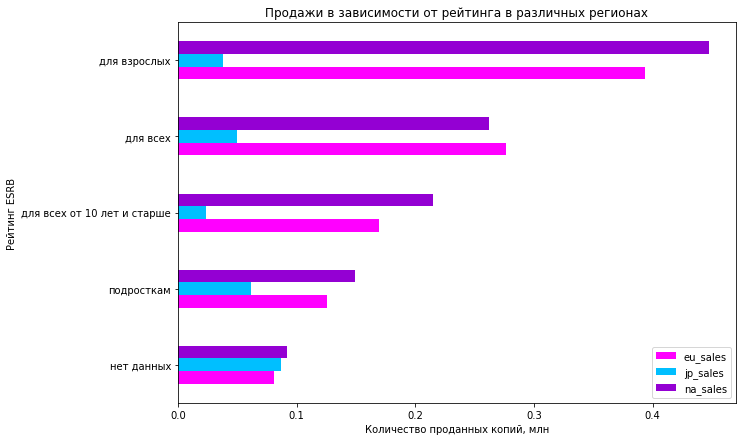

In [86]:
(
    data_clean.pivot_table(index='rating_kategory', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='mean')
    .sort_values(by='na_sales')
    .plot(kind='barh', figsize=(10, 7), color=['magenta', 'deepskyblue', 'darkviolet'])
)
plt.xlabel('Количество проданных копий, млн')
plt.ylabel('Рейтинг ESRB')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

Продажи в Северной Америке и Европе в определенных категориях рейтинга практически равны:
- на первом месте продажи в категории "для взрослых"
- на втором месте - игры "для всех"
- на третьем месте - "для всех от 10 лет и старше"
- на предпоследнем месте - "подросткам"
- на последнем месте продажи без рейтинга, рассмотрим эту категорию подробнее.

Так как в разных странах представлены разные рейтинговые модели: американская ESRB, европейская PEGI, японская CERO, то можно предположить, что игры без рейтинга выпущены не в США, а относятся к платформам в Японии или Европе.
Проверим это предположение.

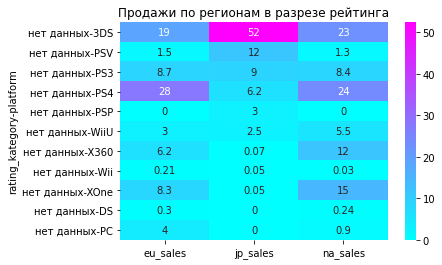

In [87]:
sns.heatmap(data_clean.query('rating_kategory == "нет данных"')
            .pivot_table(index=['rating_kategory', 'platform'], values=['na_sales', 'eu_sales', 'jp_sales'], 
                         aggfunc='sum').sort_values(by='jp_sales', ascending=False), annot=True, cmap='cool')
plt.title("Продажи по регионам в разрезе рейтинга", fontsize =12)
plt.show()

Предположение по поводу выпуска большинства игр без рейтинга в Японии подтверждается. Действительно на японских платформах 3DS и PS4 продано достаточно много копий:
- на 3DS (52 млн. в Японии, 19 млн. в Европе и 23 млн. в СА)
- на PS4 (28 млн. в Европе и 24 млн. в СА).


### Вывод по портрету геймеров в регионах

**Перспективной платформой** во всех анализируемых регионах является PS4.

PS4 является лидером по доле продаж в Европе (36.0%) и Северной Америке (24.8%), кроме того данная платформа обладает в этих регионах положительной динамикой - с 2013 по 2015гг. продажи на платформе растут.

В Японии у PS4 тоже положительная динамика, но доля рынка на текущий момент небольшая (11.3%). Несмотря на отрицательную динамику продаж по годам, несомненным лидером на японском рынке видеоигр является платформа 3DS (48.2%).

**Популярные жанры ТОП-5** практически совпадают в Европе и СА:
- Action
- Shooter
- Sports
- Role-Playing
- Racing (Европа) / Misc (СА) 

ТОП-5 жанров по суммарным продажам в Японии частично совпадает с ТОП-5 Северной Америке и Европы по содержанию, однако позиции жанров отличаются. Первые и последние места ТОП-5 противоположны - в Японии на первом месте ролевые игры (Role-Playing), на пятом Shooter:
- Role-Playing
- Action
- Misc
- Fighting
- Shooter	

Жанр Action является лидером по доле продаж во СА и Европе, в Японии доля жанра на втором месте с небольшой разницей. Но при детальном рассмотрении можно заметить:
1. В Северной Америке и Европе жанр с каждым годом теряет долю рынка.
2. В Японии динамика по годам выглядит нестабильно - отмечаются резкие скачки продаж, предположительно связанные с выпуском конкретных успешных игр.

Вторым по объему продаж в Северной Америке и Европе является жанр Shooter (25.1% и 22.4% соответственно). Динамику жанра по годам можно охарактеризовать как стабильную.

Рынок видеоигр Японии специфичен - структура по жанрам отличается, как от общемирового, так и от Северной Америки и Европы. На первом месте в Японии ролевые игры (Role-Playing, 36.3%). В последние годы наблюдается спад продаж по жанру, но количество продаж по-прежнему высокое.

Половина всех продаж игр в жанре Racing (50.61%) за 2013-2016гг. приходится на Европу.
Практически половина всех продаж игр в жанре Shooter (47.10%) за 2013-2016гг. приходится на Северную Америку, продажи в течении нескольких лет остаются на стабильном уровне.


Продажи в Северной Америке и Европе в определенных категориях рейтинга практически равны:
- на первом месте продажи в категории "для взрослых"
- на втором месте - игры "для всех"
- на третьем месте - "для всех от 10 лет и старше"
- на предпоследнем месте - "подросткам"
- на последнем месте продажи без рейтинга.

В Японии продаж значительно меньше во всех категориях по сравнению с Европой и СА, кроме продаж без рейтинга.
Это не удивительно, так как выпущенным в Японии играм присваиваются рейтинги из японской рейтинговой модели (CERO), данных по этим рейтингам в базе нет. 
На японских платформах 3DS и PS4 продано достаточно много копий:
- на 3DS (52 млн. в Японии, 19 млн. в Европе и 23 млн. в СА)
- на PS4 (28 млн. в Европе и 24 млн. в СА).

## Проверка гипотез

Проверим две гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Для проверки гипотез выберем метод st.ttest_ind, который проверяет средние двух совокупностей на равенство.

### Проверка гипотезы № 1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Сформируем нулевую и альтернативную гипотезы:

- H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = cредний пользовательский рейтинг (user_score) платформы PS
- H_a: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ cредний пользовательский рейтинг (user_score) платформы PS 

Значение критического уровня вероятности (alpha) примем равным 5%

In [88]:
xbox = data_clean.query('platform =="XOne" and user_score.notna()')['user_score']
pc = data_clean.query('platform =="PC" and user_score.notna()')['user_score']

alpha = 0.05

results = st.ttest_ind(xbox, pc)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Для дополнительного подтверждения гипотезы посмотрим распределение оценок по двум платформам и посчитаем среднее и медиану.

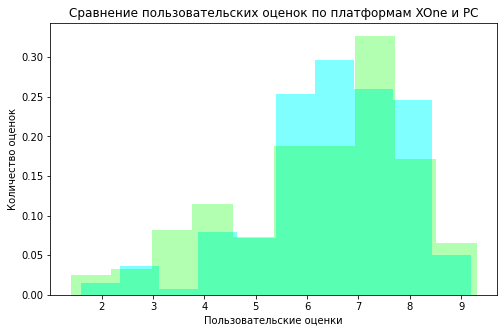

In [89]:
# распределение пользовательских оценок по разным платформам
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(data_clean[(data_clean.platform == "XOne") & (data_clean.user_score.notna())]['user_score'], 
        bins=10, density=True, alpha=0.5, color='aqua')
ax.hist(data_clean[(data_clean.platform == "PC") & (data_clean.user_score.notna())]['user_score'], 
        bins=10, density=True, alpha=0.3, color='lime')
ax.set_title('Сравнение пользовательских оценок по платформам XOne и PC')
ax.set_xlabel('Пользовательские оценки')
ax.set_ylabel("Количество оценок")
plt.show()

In [90]:
# расчет медианы и среднего оценок пользователей по платформам
xone_median = round(data_clean[(data_clean.platform == "XOne") & (data_clean.user_score.notna())]['user_score'].median(), 2)
xone_mean = round(data_clean[(data_clean.platform == "XOne") & (data_clean.user_score.notna())]['user_score'].mean(), 2)
pc_median = round(data_clean[(data_clean.platform == "PC") & (data_clean.user_score.notna())]['user_score'].median(), 2)
pc_mean = round(data_clean[(data_clean.platform == "PC") & (data_clean.user_score.notna())]['user_score'].mean(), 2)

print(f'Средняя оценка пользователей по платформе XOne - {xone_mean}, медиана значений -  {xone_median}')
print(f'Средняя оценка пользователей по платформе XOne - {pc_mean}, медиана значений -  {pc_median}')

Средняя оценка пользователей по платформе XOne - 6.52, медиана значений -  6.8
Средняя оценка пользователей по платформе XOne - 6.27, медиана значений -  6.8


Средние пользовательские рейтинги платформ Xbox One и PC не имеют существенных отличий, а медианы равны. Не столь важно, на какой платформе выпущена игра, скорее оценки пользователей зависят от конкретных игр и/или жанров. 

### Проверка гипотезы № 2: "Средние пользовательские рейтинги жанров Action и Sports разные"

Сформируем нулевую и альтернативную гипотезы:

- H_0: Средний пользовательский рейтинг (user_score) жанра Action = cредний пользовательский рейтинг (user_score) жанра Sports
- H_a: Средний пользовательский рейтинг (user_score) жанра Action  ≠ cредний пользовательский рейтинг (user_score) жанра Sports

Значение критического уровня вероятности (alpha) примем равным 5%

In [91]:
action = data_clean.query('genre =="Action" and user_score.notna()')['user_score']
sport = data_clean.query('genre =="Sports" and user_score.notna()')['user_score']

alpha = 0.05

results2 = st.ttest_ind(action, sport)
print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Для дополнительного подтверждения гипотезы посмотрим распределение оценок по двум жанрам и посчитаем среднее и медиану.

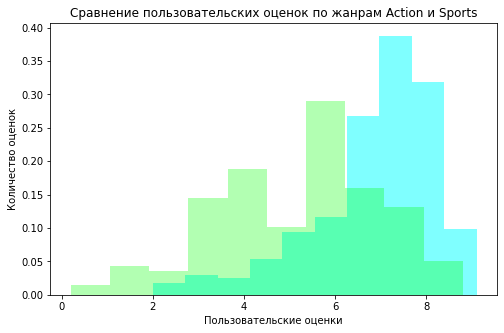

In [92]:
# распределение пользовательских оценок по разным жанрам
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(data_clean[(data_clean.genre == "Action") & (data_clean.user_score.notna())]['user_score'], 
        bins=10, density=True, alpha=0.5, color='aqua')
ax.hist(data_clean[(data_clean.genre == "Sports") & (data_clean.user_score.notna())]['user_score'], 
        bins=10, density=True, alpha=0.3, color='lime')
ax.set_title('Сравнение пользовательских оценок по жанрам Action и Sports')
ax.set_xlabel('Пользовательские оценки')
ax.set_ylabel("Количество оценок")
plt.show()

In [93]:
# расчет медианы и среднего оценок пользователей по жанрам
action_median = round(data_clean[(data_clean.genre == "Action") & (data_clean.user_score.notna())]['user_score'].median(), 2)
action_mean = round(data_clean[(data_clean.genre == "Action") & (data_clean.user_score.notna())]['user_score'].mean(), 2)
sports_median =round(data_clean[(data_clean.genre == "Sports") & (data_clean.user_score.notna())]['user_score'].median(), 2)
sports_mean = round(data_clean[(data_clean.platform == "PC") & (data_clean.user_score.notna())]['user_score'].mean(), 2)

print(f'Средняя оценка пользователей по жанру Action - {action_mean}, медиана значений -  {action_median}')
print(f'Средняя оценка пользователей по жанру Sports - {sports_mean}, медиана значений -  {sports_median}')

Средняя оценка пользователей по жанру Action - 6.84, медиана значений -  7.1
Средняя оценка пользователей по жанру Sports - 6.27, медиана значений -  5.5


Как и можно было предположить, пользовательский рейтинг различается в зависимости от жанра игры, особенно при сравнении медианных значений.

### Вывод по проверке гипотез

По итогам проверки средних двух совокупностей на равенство можно сделать следующий вывод о выдвинутых гипотезах:
- Первая гипотеза верна - пользовательский рейтинг не зависит от платформы, на которой выпущены игры (верна 0 гипотеза). 
- Вторая гипотеза также верна - пользовательский рейтинг зависит от жанров игр (верна альтернативная гипотеза).

## Общий вывод

**Рекомендации по продукту-локомотиву для планирования рекламной кампании на рынке видеоигр:**

- **Выход на рынок Северной Америки и/или Европы с видеоигрой в жанре Shooter на платформе PS4 с рейтингом ESRB 'M' (категория 'для взрослых').** 
    - **Обоснование жанра и регионов:** Жанр Action является лидером по доле продаж в Северной Америке и Европе, но при рассмотрении динамики продаж по годам можно заметить, что жанр с каждым годом теряет долю рынка. Вторым по объему продаж в этих регионах является жанр Shooter (25.1% и 22.4% соответственно). Динамику жанра по годам можно охарактеризовать как стабильную. Стоит отметить, что практически половина всех продаж игр в жанре Shooter (47.10%) за 2013-2016гг. приходится именно на Северную Америку.
    - **Обоснование платформы:**  PS4 является лидером по доле продаж в Европе (36.0%) и Северной Америке (24.8%), кроме того данная платформа обладает в этих регионах положительной динамикой - с 2013 по 2015гг. продажи на платформе растут.
    - **Обоснование рейтинга:** продажи по играм в категории 'M' на первом месте по количеству проданных копий.

**Почему выход на рынок Японии будет менее успешным:**
1. В Японии отмечается **тенденция потребление собственных продуктов индустрии видеоигр** - продажа игр, выпущенных на японских платформах 3DS и PSV, в большом объеме реализуется на внутреннем рынке (47% и 56% соответственно от общих продаж по платформам).
2. В Японии у PS4 тоже положительная динамика, но доля рынка на текущий момент небольшая (11.3%). Несмотря на отрицательную динамику продаж по годам, **несомненным лидером на японском рынке видеоигр является собственная платформа 3DS (48.2%).**
3. **Рынок видеоигр Японии специфичен** - структура по жанрам отличается, как от общемирового, так и от Северной Америки и Европы. На первом месте в Японии ролевые игры (Role-Playing, 36.3%). В последние годы наблюдается спад продаж по жанру, хотя количество продаж по-прежнему высокое. По другим жанрам не замечено явной тенденции к росту, а значит затруднительно выбрать целевой жанр. Например, по жанру Action в Японии динамика по годам выглядит нестабильно - отмечаются резкие скачки продаж, предположительно связанные с выпуском конкретных успешных игр.
4. Рынок видеоигр Японии менее емкий, чей СА и Европы. Если посмотреть суммарные продажи по регионам за 2013-2016гг., то получим следующий порядок цифр:
    - СА: 437.7 млн.
    - Европа: 392.23 млн.
    - Япония: 140.7 млн.


**Выявленные тенденции и особенности рынка видеоигр:**
- Игры-бестселлеры с продажами более 30 млн. копий (Wii Sports, Super Mario Bros., Mario Kart Wii, Wii Sports Resort, Pokemon Red/Pokemon Blue, Tetris) были выпущены в период 1985-2009гг. на платформах Wii, NES, GB. Большая доля продаж приходилась на рынки Северной Америки и/или Европы, за исключением игры "Pokemon Red/Pokemon Blue" (по ней продажи примерно равны в Северной Америке, Европе и Японии).
- Северная Америка является первостепенным рынком сбыта у XOne и X360. Практически 60% продаж игр на данных платформах приходятся именно на этот регион.
- В Японии отмечается тенденция потребление собственных продуктов индустрии видеоигр - продажа игр, выпущенных на японских платформах 3DS и PSV, в большом объеме реализуется на внутреннем рынке (47% и 56% соответственно от общих продаж по платформам).
- Половина всех продаж игр в жанре Racing (50.61%) за 2013-2016гг. приходится на Европу. 
- Практически половина всех продаж игр в жанре Shooter (47.10%) за 2013-2016гг. приходится на Северную Америку.

**Проверка выдвинутых гипотез** дала следующий результат:
- "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" – гипотеза ВЕРНА.
- "Средние пользовательские рейтинги жанров Action и Sports разные" – гипотеза ВЕРНА.